In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from matplotlib_venn import venn2
import calendar
from collections import defaultdict

In [2]:
city_years = {
 'Francisco_Bay':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [3]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data'
dir_list = os.listdir(path)
print(dir_list)

['cnc', '.DS_Store', 'San_Franciso', 'San_Francisco_Bay_2020.csv', 'San_Francisco_Bay_2021.csv', 'census_ethnicities', 'San_Francisco_Bay_2023.csv', 'San_Francisco_Bay_2022.csv', 'Los_Angeles_2017.csv', 'San_Francisco_Bay_2019.csv', 'San_Francisco_Bay_2018.csv', 'non_cnc', 'San_Francisco_Bay_2016.csv', 'northcarolina', 'San_Francisco_Bay_2017.csv', 'Los_Angeles', 'old data']


In [4]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/San_{}_{}.csv".format(city, year))
    
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Francisco_Bay'][2016].head()

Loading:  Francisco_Bay 2016
Loading:  Francisco_Bay 2017
Loading:  Francisco_Bay 2018
Loading:  Francisco_Bay 2019
Loading:  Francisco_Bay 2020
Loading:  Francisco_Bay 2021
Loading:  Francisco_Bay 2022
Loading:  Francisco_Bay 2023


,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,preferred_common_name,iconic_taxon_name,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications
0,20069,1:15 pm.,2016-07-14,2016-07-14T13:15:00-07:00,America/Los_Angeles,2011-06-03T14:51:45-07:00,2020-02-09T08:18:18-08:00,Seen in grass. Individual had >5 ticks from e...,1704,casual,...,Western Alligator Lizards,Reptilia,genus,797512.0,False,False,False,36300.0,36300.0,"[{'user_id': 1704, 'category': 'leading', 'dis..."
1,20070,1:00 pm.,2016-03-25,2016-03-25T13:00:00-07:00,America/Los_Angeles,2011-06-03T14:53:13-07:00,2020-02-09T08:18:11-08:00,Female mallard duck with multiple ducklings.,1704,casual,...,Mallard,Aves,species,6922.0,True,False,False,462859.0,462859.0,"[{'user_id': 642, 'category': 'leading', 'disa..."
2,68373,6:30,2016-02-12,2016-02-12T06:30:00-08:00,America/Los_Angeles,2012-04-20T20:36:48-07:00,2020-08-01T14:11:59-07:00,This flower has blue/purple petals that are di...,5844,casual,...,periwinkles,Plantae,genus,632394.0,False,False,False,98028.0,98028.0,"[{'user_id': 5844, 'category': 'leading', 'dis..."
3,158736,2:19,2016-10-14,2016-10-14T14:19:00-07:00,America/Los_Angeles,2012-12-06T20:23:52-08:00,2016-10-14T01:56:44-07:00,We saw our first devil's coach-horse beetle as...,11548,casual,...,Devil's Coach Horse Beetle,Insecta,species,1270925.0,False,False,False,10365.0,10365.0,"[{'user_id': 11548, 'category': 'leading', 'di..."
4,538018,2016-04-10 2:20:00 PM PDT,2016-04-10,2016-04-10T14:20:00-07:00,America/Los_Angeles,2014-02-20T15:40:40-08:00,2016-04-10T21:06:27-07:00,NaN,16603,research,...,Western Fence Lizard,Reptilia,species,36141.0,True,False,False,119535.0,119535.0,"[{'user_id': 16603, 'category': 'improving', '..."


#### Dataset comprises of 4214727 observations and 38 characteristics.

In [10]:
dfall.shape

(4214727, 38)

In [11]:
dfall.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'created_time_zone', 'created_at', 'updated_at', 'description',
       'user_id', 'quality_grade', 'reviewed_by', 'faves_count',
       'num_identification_agreements', 'num_identification_disagreements',
       'identifications_most_agree', 'identifications_most_disagree',
       'captive', 'place_guess', 'place_ids', 'longitude', 'latitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy', 'obscured',
       'species_guess', 'taxon_id', 'taxon_name', 'preferred_common_name',
       'iconic_taxon_name', 'taxon_rank', 'taxon_parent_id', 'taxon_native',
       'taxon_endemic', 'taxon_threatened', 'taxon_search_rank',
       'taxon_observations', 'identifications'],
      dtype='object')

In [12]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4214727 entries, 0 to 827047
Data columns (total 38 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id                                int64  
 1   observed_on_string                object 
 2   observed_on                       object 
 3   time_observed_at                  object 
 4   created_time_zone                 object 
 5   created_at                        object 
 6   updated_at                        object 
 7   description                       object 
 8   user_id                           int64  
 9   quality_grade                     object 
 10  reviewed_by                       object 
 11  faves_count                       int64  
 12  num_identification_agreements     int64  
 13  num_identification_disagreements  int64  
 14  identifications_most_agree        bool   
 15  identifications_most_disagree     bool   
 16  captive                           boo

In [17]:
dfall.isnull().any()

id                                  False
observed_on_string                  False
observed_on                         False
time_observed_at                     True
created_time_zone                   False
created_at                          False
updated_at                          False
description                          True
user_id                             False
quality_grade                       False
reviewed_by                         False
faves_count                         False
num_identification_agreements       False
num_identification_disagreements    False
identifications_most_agree          False
identifications_most_disagree       False
captive                             False
place_guess                          True
place_ids                           False
longitude                           False
latitude                            False
positional_accuracy                  True
geoprivacy                           True
taxon_geoprivacy                  

In [18]:
dfall.describe()

,id,user_id,faves_count,num_identification_agreements,num_identification_disagreements,longitude,latitude,positional_accuracy,taxon_id,taxon_parent_id,taxon_search_rank,taxon_observations
count,4.214727e+06,4.214727e+06,4.214727e+06,4.214727e+06,4.214727e+06,4.214727e+06,4.214727e+06,3.418303e+06,4.182319e+06,4.179139e+06,4.182319e+06,4.182319e+06
mean,8.393991e+07,1.630074e+06,1.417340e-02,1.058821e+00,1.078575e-02,-1.223343e+02,3.778301e+01,1.853485e+03,1.360414e+05,3.038949e+05,1.582589e+06,1.582589e+06
std,5.680766e+07,1.900734e+06,1.634878e-01,9.276201e-01,1.062482e-01,3.450884e-01,3.950019e-01,1.162812e+06,2.411870e+05,4.424825e+05,1.024968e+07,1.024968e+07
min,2.006900e+04,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.235998e+02,3.680372e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.285735e+07,9.284600e+04,0.000000e+00,0.000000e+00,0.000000e+00,-1.225163e+02,3.744806e+01,5.000000e+00,4.775100e+04,4.768500e+04,5.924000e+03,5.924000e+03
50%,7.597378e+07,7.986330e+05,0.000000e+00,1.000000e+00,0.000000e+00,-1.223214e+02,3.779179e+01,1.300000e+01,5.343500e+04,5.340800e+04,1.888200e+04,1.888200e+04
75%,1.326792e+08,2.596349e+06,0.000000e+00,2.000000e+00,0.000000e+00,-1.220994e+02,3.799476e+01,6.500000e+01,8.166200e+04,4.760880e+05,7.327400e+04,7.327400e+04
max,1.949811e+08,7.694117e+06,9.300000e+01,2.900000e+01,7.000000e+00,-1.212006e+02,3.899956e+01,2.147484e+09,1.520980e+06,1.520989e+06,1.832068e+08,1.832068e+08


In [24]:
## Total observation made in each year

sf_2016 = dfs['Francisco_Bay'][2016]
print('Total observation in 2016:',sf_2016.shape[0])

sf_2017 = dfs['Francisco_Bay'][2017]
print('Total observation in 2017:',sf_2017.shape[0])

sf_2018 = dfs['Francisco_Bay'][2018]
print('Total observation in 2018:',sf_2018.shape[0])

sf_2019 = dfs['Francisco_Bay'][2019]
print('Total observation in 2019:',sf_2019.shape[0])

sf_2020 = dfs['Francisco_Bay'][2020]
print('Total observation in 2020:',sf_2020.shape[0])

sf_2021 = dfs['Francisco_Bay'][2021]
print('Total observation in 2021:',sf_2021.shape[0])

sf_2022 = dfs['Francisco_Bay'][2022]
print('Total observation in 2022:',sf_2022.shape[0])

sf_2023 = dfs['Francisco_Bay'][2023]
print('Total observation in 2023:',sf_2023.shape[0])

Total observation in 2016: 140620
Total observation in 2017: 216210
Total observation in 2018: 349490
Total observation in 2019: 494866
Total observation in 2020: 632327
Total observation in 2021: 764634
Total observation in 2022: 789532
Total observation in 2023: 827048


In [21]:
unique_users = len(dfall['user_id'].value_counts())
unique_users

116656

In [20]:
len(dfall['user_id'].value_counts())

116656

## To check missing values

In [26]:
def missing_val(df):

    missing_val = sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
    
    return missing_val

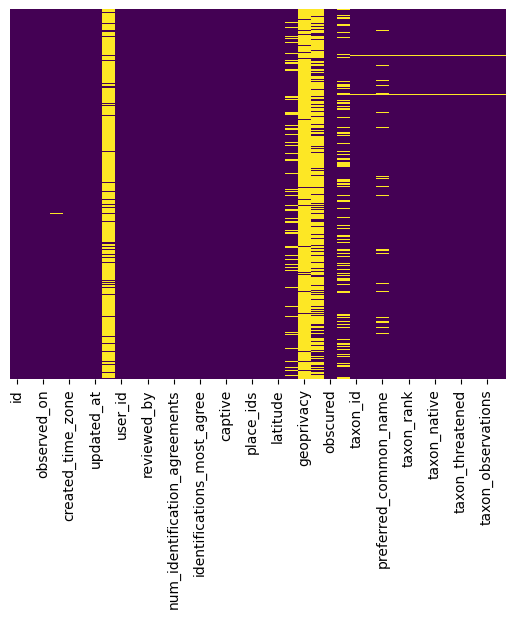

In [27]:
datasets = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

missing_values = {}

for i, df in enumerate(datasets):
    year = years[i]
    missing_values[year] = missing_val(df)

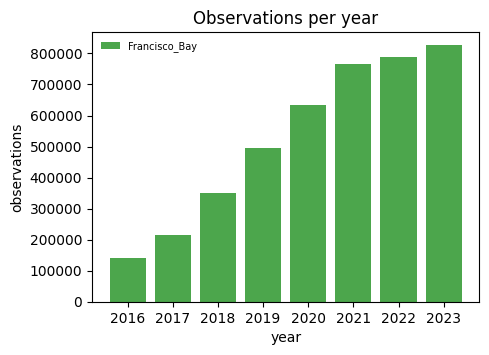

In [28]:
#bar plot to observation per year

fig = plt.figure(figsize=(5, 3.5))

for city, dfyears in dfs.items():
    x = []
    y = []
    for year, df in dfyears.items():
        x.append(year)
        y.append(len(df))
    #plt.plot(x, y, '-o',label=city,color= 'green', alpha=0.7)
    plt.bar(x, y,label=city,color= 'green', alpha=0.7)

plt.xlabel("year")
plt.ylabel("observations")
plt.title("Observations per year")
plt.legend(frameon=False, fontsize=7, loc='upper left')
plt.ylim(ymin=0)
plt.show()

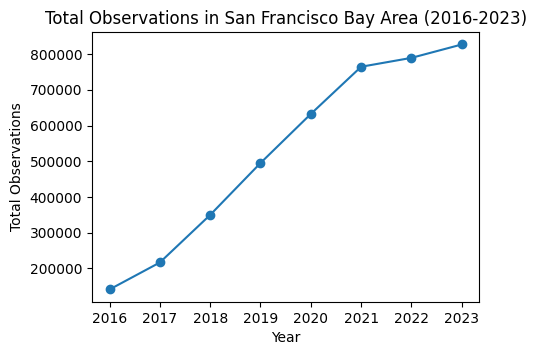

In [32]:
# Data
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
observations = [sf_2016.shape[0], sf_2017.shape[0], sf_2018.shape[0],sf_2019.shape[0], sf_2020.shape[0],sf_2021.shape[0],sf_2022.shape[0],sf_2023.shape[0]]

# Plotting
plt.figure(figsize=(5, 3.5))
plt.plot(years, observations, marker='o', linestyle='-')
plt.title('Total Observations in San Francisco Bay Area (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Total Observations')
#plt.grid(True)
plt.show()


In [29]:
# unique users for each year 
def unique_users(df):

    #total_users = len(df)
    user_unique = len(df['user_id'].value_counts())
    
    return user_unique

In [30]:
datasets = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

unique_users_per_year = {}

for i, df in enumerate(datasets):
    year = years[i]
    unique_users_per_year[year] = unique_users(df)
    print(f'Total number of participants in San Francisco {year}:', unique_users_per_year[year])


Total number of participants in San Francisco 2016: 5702
Total number of participants in San Francisco 2017: 9061
Total number of participants in San Francisco 2018: 16002
Total number of participants in San Francisco 2019: 24362
Total number of participants in San Francisco 2020: 29781
Total number of participants in San Francisco 2021: 34270
Total number of participants in San Francisco 2022: 34619
Total number of participants in San Francisco 2023: 32843


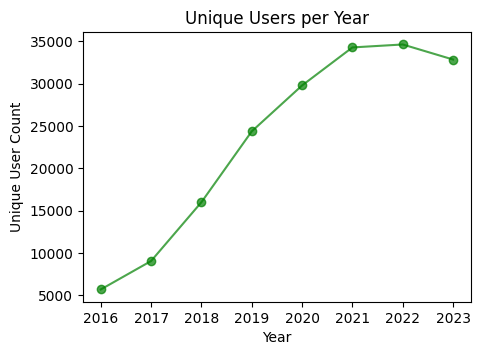

In [31]:
# Plotting
"""
unique_users_per_year.keys(): This retrieves the keys from the dictionary 
'unique_users_per_year.values(): This retrieves the values associated with the keys in the dictionary '
"""
plt.figure(figsize=(5, 3.5))
plt.plot(unique_users_per_year.keys(), unique_users_per_year.values(),marker='o', color= 'green', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Unique User Count')
plt.title('Unique Users per Year')
plt.xticks(years)
#plt.grid(axis='y')
plt.show()